<font color=red size=7> Data Scientist </font>AHMETKURT

<font color=green size=7> Recommender system for a medical supplies company</font>

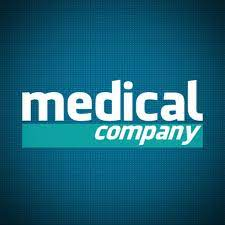

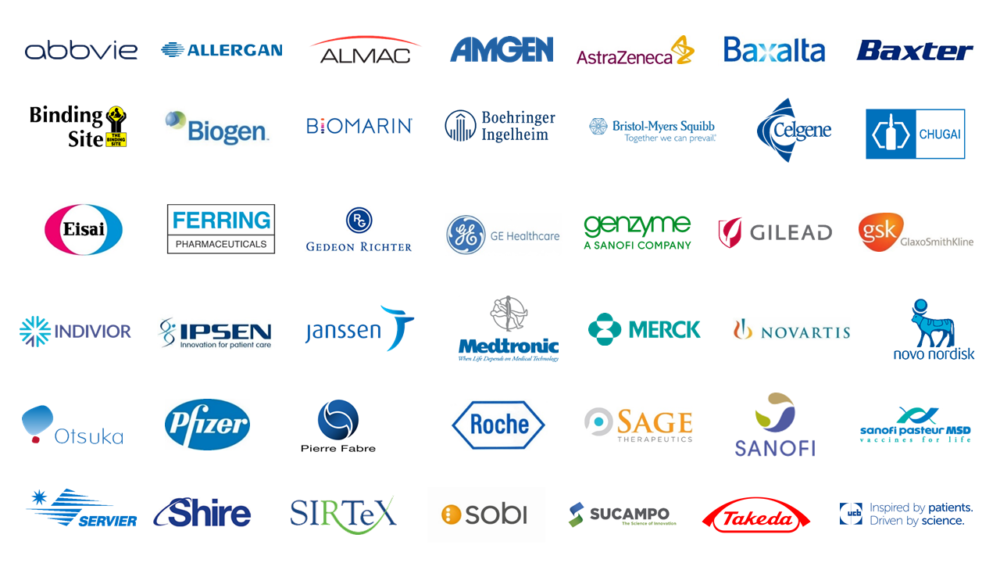

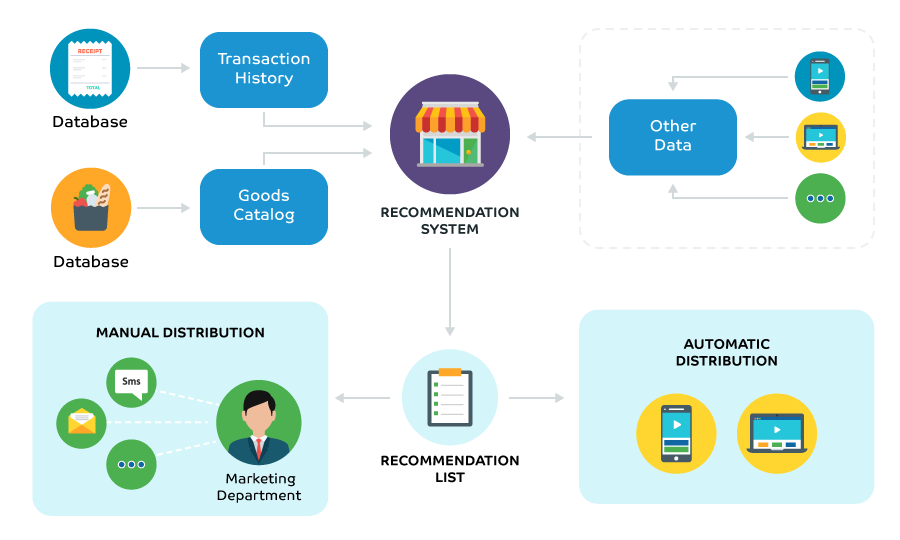

## Build a recommender system

#### The goal of the project is to help the company generate incremental sales by implementing a recommender system.

## Data Prep and Modelling
##### ▪ Missing data
##### ▪ Calculate find most popular product using maximum sales by volume and dollar amount
##### ▪ Company with maximum purchase
##### ▪ Build a popularity based recommender system
##### ▪ Build a recommender system using matrix factorization
##### ▪ Cosine similarity for product description

# IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',185)
pd.set_option('display.max_rows',185)

import missingno as msng

# LOAD DATA & EXPLORATORY DATA ANALYSIS & DATA VISUALIZATIONS

In [12]:
df= pd.read_csv("PBL 5 recommendation data.csv",encoding='latin-1')

In [3]:
df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,Orders.payment_amount,Orders.purchase_order,Orders.payment_id,Orders.payment_code,Orders.payment_ref,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.comments,Orders.notes,Orders.registry_id,Orders.gift_message,Orders.website,Orders.mailing,Orders.flags,Orders.partial_ship,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.attributes,Order_Items.attribute_names,Order_Items.attribute_prices,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.registry_item,Order_Items.related_id,Order_Items.reorder_frequency,Order_Items.account_id,Order_Items.flags,Products.id,Products.status,Products.product_type,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.menu_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.right_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_brand,Products.shopping_mpn,Products.shopping_gender,Products.shopping_color,Products.shopping_age,Products.shopping_flags,Products.amazon_asin,Products.amazon_type,Products.amazon_item_type,Products.amazon_price,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.google_adwords,Products.shopping_cat,Products.shopping_type,Products.pricegrabber_cat,Products.shopzilla_cat,Products.thefind_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.price_break_type,Products.price_breaks,Products.short_description,Products.long_description,Products.websites,Products.video,Products.audio,Products.seo_title,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764306,0.0,3758,797,Christy,Dill,Company0,3758,NaN,NaN,NaN,USD,NaN,57.20,0.0,9.95,13.0,2.86,NaN,NaN,NaN,NaN,NaN,NaN,64.29,NaN,fedex,11|Ground,NaN,NaN,NaN,5.7204E+14,3.0,1.426019e+09,NaN,authorize.net,NaN,64.29,NaN,6993607863,510142,NaN,1,1426019099,1.438868e+09,1.426101e+09,NaN,Insured By Eye4Fraud,NaN,NaN,NaN,NaN,NaN,NaN,0.0,528

In [4]:
df.tail()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,Orders.payment_amount,Orders.purchase_order,Orders.payment_id,Orders.payment_code,Orders.payment_ref,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.comments,Orders.notes,Orders.registry_id,Orders.gift_message,Orders.website,Orders.mailing,Orders.flags,Orders.partial_ship,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.attributes,Order_Items.attribute_names,Order_Items.attribute_prices,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.registry_item,Order_Items.related_id,Order_Items.reorder_frequency,Order_Items.account_id,Order_Items.flags,Products.id,Products.status,Products.product_type,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.menu_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.right_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_brand,Products.shopping_mpn,Products.shopping_gender,Products.shopping_color,Products.shopping_age,Products.shopping_flags,Products.amazon_asin,Products.amazon_type,Products.amazon_item_type,Products.amazon_price,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.google_adwords,Products.shopping_cat,Products.shopping_type,Products.pricegrabber_cat,Products.shopzilla_cat,Products.thefind_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.price_break_type,Products.price_breaks,Products.short_description,Products.long_description,Products.websites,Products.video,Products.audio,Products.seo_title,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
4189,3730,Nora,Fontana,NaN,1463408698,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1463408698,0.0,17421,3730,Nora,Fontana,NaN,17421,NaN,NaN,NaN,USD,NaN,14.85,1.21,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.463409e+09,NaN,paypal,PayPal,16.06,NaN,16706988SV3261147,NaN,NaN,0,1463408854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,20186,17421,1842.0,"Medline Emesis/Barf Bags, throw up bag

In [5]:
df.isnull().sum()

Customers.id                         0
Customers.fname                      0
Customers.lname                      0
Customers.company                 3467
Customers.create_date                0
Customers.status                  4093
Customers.mailing                 2080
Customers.reminders               4194
Customers.tax_exempt              4189
Customers.account_id              4191
Customers.sales_rep               4194
Customers.rewards                 4194
Customers.profile_id              4194
Customers.last_modified              0
Customers.customer_type            423
Orders.id                            0
Orders.customer_id                   0
Orders.fname                         0
Orders.lname                         0
Orders.company                    3466
Orders.order_number                  0
Orders.reorder_id                 4112
Orders.external_source            3829
Orders.external_id                4189
Orders.currency                      0
Orders.sales_rep         

<AxesSubplot:>

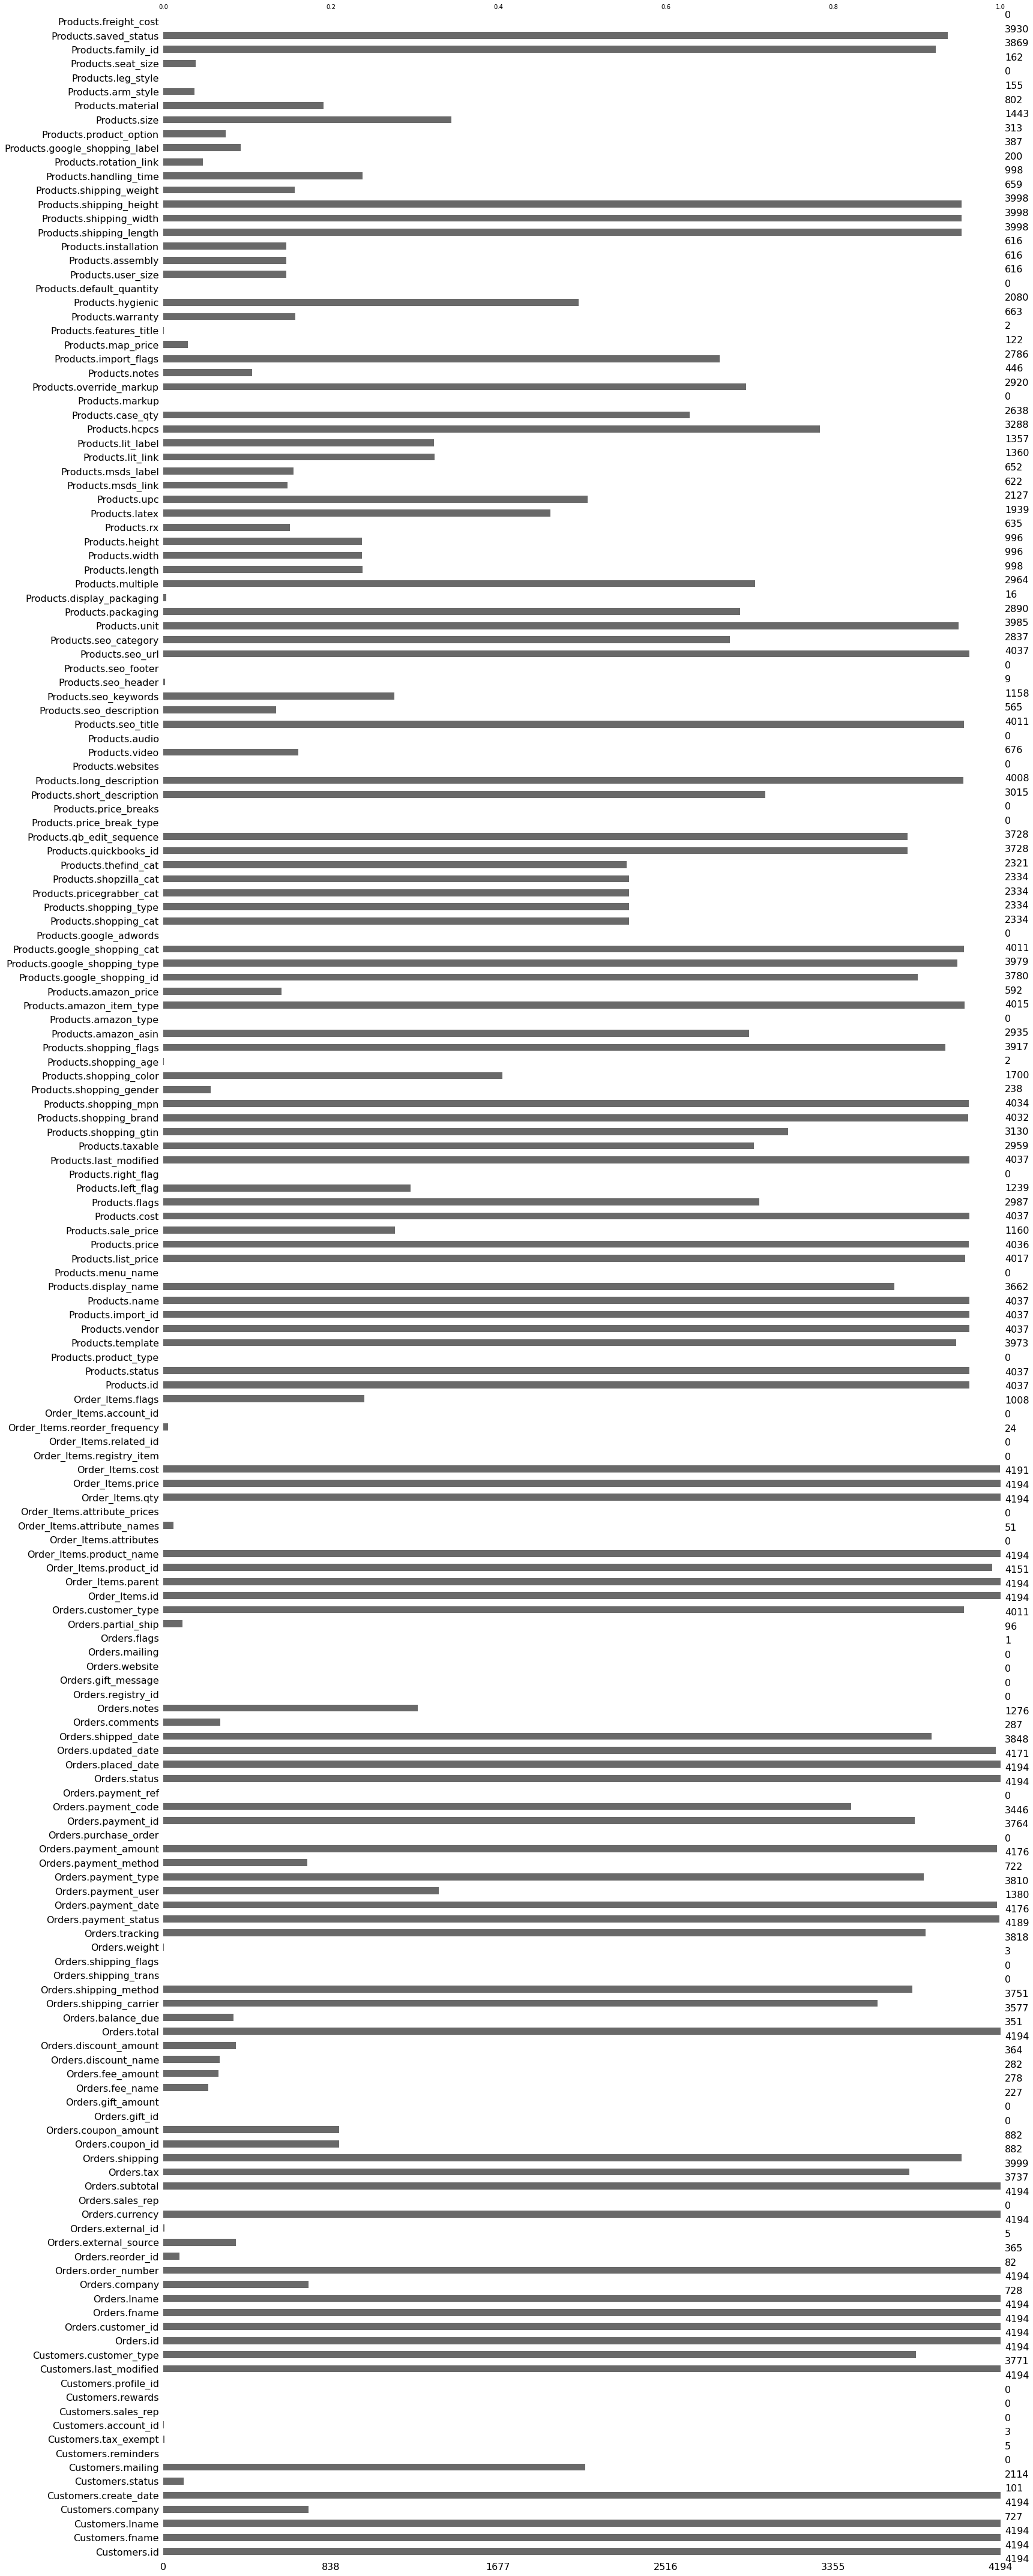

In [6]:
msng.bar(df)

<AxesSubplot:>

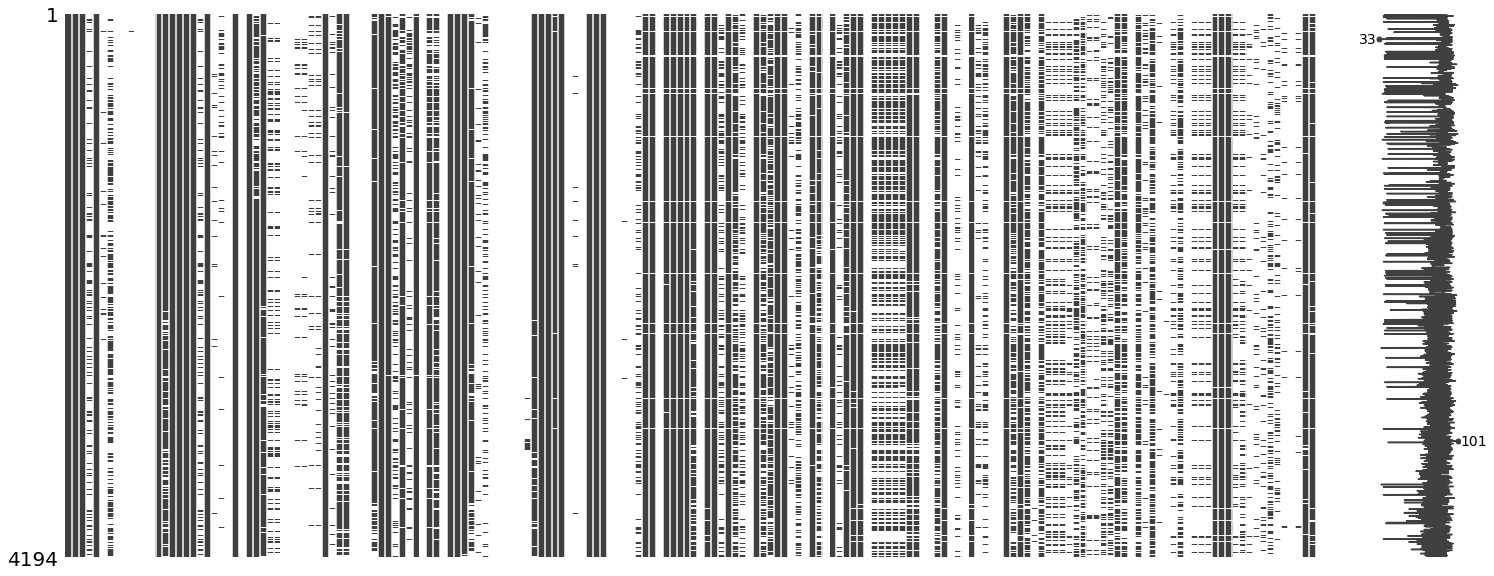

In [7]:
msng.matrix(df)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Columns: 181 entries, Customers.id to Products.freight_cost
dtypes: float64(98), int64(10), object(73)
memory usage: 5.8+ MB


# Missing Data

In [9]:
#1-remove empty columns
#2-add back important columns

In [13]:
#1
df=df.dropna(axis=1,how="any")

In [14]:
#2
df["Customers.company"]=df["Customers.company"]

In [15]:
#2
df["Products.shopping_brand"]=df["Products.shopping_brand"]

In [16]:
#2
df["Orders.payment_method"]=df["Orders.payment_method"]

In [17]:
#2
df["Orders.shipping_method"]=df["Orders.shipping_method"]


In [19]:
df["Full_Name"]=df["Customers.fname"]+" "+df["Customers.lname"]

In [20]:
df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.create_date,Customers.last_modified,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.order_number,Orders.currency,Orders.subtotal,Orders.total,Orders.status,Orders.placed_date,Order_Items.id,Order_Items.parent,Order_Items.product_name,Order_Items.qty,Order_Items.price,Customers.company,Products.shopping_brand,Orders.payment_method,Orders.shipping_method,Full_Name
0,797,Christy,Dill,1426018724,1437764306,3758,797,Christy,Dill,3758,USD,57.20,64.29,1,1426019099,5284,3758,"Basic Rollators, Green",1,57.20,Company0,MEDLINE,NaN,11|Ground,Christy Dill
1,3,John,Smith,1386089139,1437764354,23,3,John,Smith,23,USD,20.00,29.99,1,1386090455,31,23,"Urinary Drain Bags,0.000",4,5.00,Company1,MEDLINE,NaN,11|Ground,John Smith
2,3,John,Smith,1386089139,1437764354,9531,3,John,Smith,9531,USD,68.78,78.73,3,1449603652,11655,9531,"SensiCare Nitrile Exam Gloves, Blue, XX-Large",1,68.78,Company1,MEDLINE,NaN,0|Standard Shipping,John Smith
3,4,James,Anderson,1386780263,1437762646,29,4,James,Anderson,29,USD,19.56,29.55,1,1386780263,1816,29,Basket for 2-Button Walkers,1,19.56,NaN,MEDLINE,Credit Card,11|Ground,James Anderson
4,5,Abraham,Pollak,1386861599,1437764316,30,5,Abraham,Pollak,30,USD,36.05,46.00,1,1386861599,40,30,Tens Units,1,36.05,Company3,ROSCOE MEDICAL INC,Credit Card,11|Ground,Abraham Pollak


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customers.id              4194 non-null   int64  
 1   Customers.fname           4194 non-null   object 
 2   Customers.lname           4194 non-null   object 
 3   Customers.create_date     4194 non-null   int64  
 4   Customers.last_modified   4194 non-null   int64  
 5   Orders.id                 4194 non-null   int64  
 6   Orders.customer_id        4194 non-null   int64  
 7   Orders.fname              4194 non-null   object 
 8   Orders.lname              4194 non-null   object 
 9   Orders.order_number       4194 non-null   object 
 10  Orders.currency           4194 non-null   object 
 11  Orders.subtotal           4194 non-null   float64
 12  Orders.total              4194 non-null   float64
 13  Orders.status             4194 non-null   int64  
 14  Orders.p

## Most Popular Product 

In [22]:
#Calculate to find the most popular product using maximum sale
# for sorting create a function with Total expenditure and total amount,number

In [23]:
def m_pop(column_name,ranking="total"):
    grouped=df.groupby(column_name).agg({ "Order_Items.qty":[np.size,np.sum,np.mean],"Order_Items.price":[np.mean]})
    grouped["Total_Amount"]=grouped["Order_Items.qty"]["sum"]*grouped["Order_Items.price"]["mean"]
    if ranking=="sum":
        return grouped.sort_values(("Order_Items.qty","sum"),ascending=False).head(5)
    else:
        return grouped.sort_values(("Total_Amount"),ascending=False).head(5)

### Sales Ranking

In [24]:
m_pop("Order_Items.product_name","sum")

Order_Items.qty       \
                                                              size  sum   
Order_Items.product_name                                                  
TruTemp                                                          1  500   
Disposable Emergency Blanket, Gray, Not Applicable              14  305   
2-Ply Tissue/Poly Professional Towels, White, N...               2  220   
Medline MoliCare Super Plus Disposable Adult Di...              53  164   
Sanitary Pads with Adhesive & Wings                              2  133   

                                                                \
                                                          mean   
Order_Items.product_name                                         
TruTemp                                             500.000000   
Disposable Emergency Blanket, Gray, Not Applicable   21.785714   
2-Ply Tissue/Poly Professional Towels, White, N...  110.000000   
Medline MoliCare Super Plus Disposable Adult Di...    3.094340   
Sanitary Pads with Adhesive & Wings                  66.500000   

                                                   Order_Items.price  \
                                                                mean   
Order_Items.product_name                                               
TruTemp                                                     2.990000   
Disposable Emergency Blanket, Gray, Not Applicable         34.610000   
2-Ply Tissue/Poly Professional Towels, White, N...         25.270000   
Medline MoliCare Super Plus Disposable Adult Di...         54.760377   
Sanitary Pads with Adhesive & Wings                        42.320000   

                                                    Total_Amount  
                                                                  
Order_Items.product_name                                          
TruTemp                                              1495.000000  
Disposable Emergency Blanket, Gray, Not Applicable  10556.050000  
2-Ply Tissue/Poly Professional Towels, White, N...   5559.400000  
Medline MoliCare Super Plus Disposable Adult Di...   8980.701887  
Sanitary Pads with Adhesive & Wings                  5628.560000

### Total Amount Ranking by Porduct 

In [25]:
m_pop("Order_Items.product_name")


Order_Items.qty       \
                                                              size  sum   
Order_Items.product_name                                                  
Disposable Emergency Blanket, Gray, Not Applicable              14  305   
Medline MoliCare Super Plus Disposable Adult Di...              53  164   
Medline Deluxe Aluminum Transport Chair With Ha...              46   47   
Sanitary Pads with Adhesive & Wings                              2  133   
2-Ply Tissue/Poly Professional Towels, White, N...               2  220   

                                                                \
                                                          mean   
Order_Items.product_name                                         
Disposable Emergency Blanket, Gray, Not Applicable   21.785714   
Medline MoliCare Super Plus Disposable Adult Di...    3.094340   
Medline Deluxe Aluminum Transport Chair With Ha...    1.021739   
Sanitary Pads with Adhesive & Wings                  66.500000   
2-Ply Tissue/Poly Professional Towels, White, N...  110.000000   

                                                   Order_Items.price  \
                                                                mean   
Order_Items.product_name                                               
Disposable Emergency Blanket, Gray, Not Applicable         34.610000   
Medline MoliCare Super Plus Disposable Adult Di...         54.760377   
Medline Deluxe Aluminum Transport Chair With Ha...        126.620870   
Sanitary Pads with Adhesive & Wings                        42.320000   
2-Ply Tissue/Poly Professional Towels, White, N...         25.270000   

                                                    Total_Amount  
                                                                  
Order_Items.product_name                                          
Disposable Emergency Blanket, Gray, Not Applicable  10556.050000  
Medline MoliCare Super Plus Disposable Adult Di...   8980.701887  
Medline Deluxe Aluminum Transport Chair With Ha...   5951.180870  
Sanitary Pads with Adhesive & Wings                  5628.560000  
2-Ply Tissue/Poly Professional Towels, White, N...   5559.400000

### The Most Product Purchases Ranking by Company

In [26]:
m_pop("Customers.company","sum")


Order_Items.qty                 Order_Items.price  \
                             size  sum       mean              mean   
Customers.company                                                     
Company59                      15  381  25.400000         34.610000   
Company343                      2  133  66.500000         42.320000   
Company86                      11  105   9.545455         18.400000   
Company130                     17   71   4.176471         28.382353   
Company171                     12   47   3.916667         31.941667   

                   Total_Amount  
                                 
Customers.company                
Company59          13186.410000  
Company343          5628.560000  
Company86           1932.000000  
Company130          2015.147059  
Company171          1501.258333

### Total Amount by  Comapany

In [27]:
m_pop("Customers.company")

Order_Items.qty                 Order_Items.price  \
                             size  sum       mean              mean   
Customers.company                                                     
Company59                      15  381  25.400000         34.610000   
Company343                      2  133  66.500000         42.320000   
Company17                       2   27  13.500000        177.190000   
Company159                     11   47   4.272727         80.058182   
Company281                      4   43  10.750000         62.910000   

                   Total_Amount  
                                 
Customers.company                
Company59          13186.410000  
Company343          5628.560000  
Company17           4784.130000  
Company159          3762.734545  
Company281          2705.130000

### The Most Popular Product

In [28]:
m_pop("Order_Items.product_name","sum")

Order_Items.qty       \
                                                              size  sum   
Order_Items.product_name                                                  
TruTemp                                                          1  500   
Disposable Emergency Blanket, Gray, Not Applicable              14  305   
2-Ply Tissue/Poly Professional Towels, White, N...               2  220   
Medline MoliCare Super Plus Disposable Adult Di...              53  164   
Sanitary Pads with Adhesive & Wings                              2  133   

                                                                \
                                                          mean   
Order_Items.product_name                                         
TruTemp                                             500.000000   
Disposable Emergency Blanket, Gray, Not Applicable   21.785714   
2-Ply Tissue/Poly Professional Towels, White, N...  110.000000   
Medline MoliCare Super Plus Disposable Adult Di...    3.094340   
Sanitary Pads with Adhesive & Wings                  66.500000   

                                                   Order_Items.price  \
                                                                mean   
Order_Items.product_name                                               
TruTemp                                                     2.990000   
Disposable Emergency Blanket, Gray, Not Applicable         34.610000   
2-Ply Tissue/Poly Professional Towels, White, N...         25.270000   
Medline MoliCare Super Plus Disposable Adult Di...         54.760377   
Sanitary Pads with Adhesive & Wings                        42.320000   

                                                    Total_Amount  
                                                                  
Order_Items.product_name                                          
TruTemp                                              1495.000000  
Disposable Emergency Blanket, Gray, Not Applicable  10556.050000  
2-Ply Tissue/Poly Professional Towels, White, N...   5559.400000  
Medline MoliCare Super Plus Disposable Adult Di...   8980.701887  
Sanitary Pads with Adhesive & Wings                  5628.560000

### The highest turnover by product

In [29]:
m_pop("Order_Items.product_name","total")

Order_Items.qty       \
                                                              size  sum   
Order_Items.product_name                                                  
Disposable Emergency Blanket, Gray, Not Applicable              14  305   
Medline MoliCare Super Plus Disposable Adult Di...              53  164   
Medline Deluxe Aluminum Transport Chair With Ha...              46   47   
Sanitary Pads with Adhesive & Wings                              2  133   
2-Ply Tissue/Poly Professional Towels, White, N...               2  220   

                                                                \
                                                          mean   
Order_Items.product_name                                         
Disposable Emergency Blanket, Gray, Not Applicable   21.785714   
Medline MoliCare Super Plus Disposable Adult Di...    3.094340   
Medline Deluxe Aluminum Transport Chair With Ha...    1.021739   
Sanitary Pads with Adhesive & Wings                  66.500000   
2-Ply Tissue/Poly Professional Towels, White, N...  110.000000   

                                                   Order_Items.price  \
                                                                mean   
Order_Items.product_name                                               
Disposable Emergency Blanket, Gray, Not Applicable         34.610000   
Medline MoliCare Super Plus Disposable Adult Di...         54.760377   
Medline Deluxe Aluminum Transport Chair With Ha...        126.620870   
Sanitary Pads with Adhesive & Wings                        42.320000   
2-Ply Tissue/Poly Professional Towels, White, N...         25.270000   

                                                    Total_Amount  
                                                                  
Order_Items.product_name                                          
Disposable Emergency Blanket, Gray, Not Applicable  10556.050000  
Medline MoliCare Super Plus Disposable Adult Di...   8980.701887  
Medline Deluxe Aluminum Transport Chair With Ha...   5951.180870  
Sanitary Pads with Adhesive & Wings                  5628.560000  
2-Ply Tissue/Poly Professional Towels, White, N...   5559.400000

### Top shopping customer

In [30]:
m_pop("Full_Name","sum")

Order_Items.qty                  Order_Items.price  \
                                      size  sum        mean              mean   
Full_Name                                                                       
United promotion promotion               2  505  252.500000            68.425   
RoseAnn Reyes                           10  300   30.000000            34.610   
David Oconnell                           2  220  110.000000            25.270   
Burten  Leibowitz                        2  133   66.500000            42.320   
Eleni Ventsanos                         11  105    9.545455            18.400   

                           Total_Amount  
                                         
Full_Name                                
United promotion promotion    34554.625  
RoseAnn Reyes                 10383.000  
David Oconnell                 5559.400  
Burten  Leibowitz              5628.560  
Eleni Ventsanos                1932.000

In [31]:
m_pop("Full_Name","total")

Order_Items.qty             Order_Items.price  \
                                      size  sum   mean              mean   
Full_Name                                                                  
United promotion promotion               2  505  252.5            68.425   
RoseAnn Reyes                           10  300   30.0            34.610   
Burten  Leibowitz                        2  133   66.5            42.320   
David Oconnell                           2  220  110.0            25.270   
Lalith Paulus                            2   27   13.5           177.190   

                           Total_Amount  
                                         
Full_Name                                
United promotion promotion    34554.625  
RoseAnn Reyes                 10383.000  
Burten  Leibowitz              5628.560  
David Oconnell                 5559.400  
Lalith Paulus                  4784.130

### Most shopped brand

In [32]:
m_pop("Products.shopping_brand","sum")

Order_Items.qty                  \
                                        size   sum      mean   
Products.shopping_brand                                        
MEDLINE                                 2672  4939  1.848428   
Drive Medical                            535   567  1.059813   
HARTMANN-CONCO INC                       122   324  2.655738   
CanDo&reg;                               113   182  1.610619   
Fabrication Enterprises Inc.              85   112  1.317647   

                             Order_Items.price   Total_Amount  
                                          mean                 
Products.shopping_brand                                        
MEDLINE                              59.674308  294731.405408  
Drive Medical                       120.378224   68254.453178  
HARTMANN-CONCO INC                   58.843525   19065.301967  
CanDo&reg;                           30.438761    5539.854513  
Fabrication Enterprises Inc.         49.979882    5597.746824

In [33]:
# Top paid brand

In [34]:
m_pop("Products.shopping_brand","total")

Order_Items.qty                  \
                                        size   sum      mean   
Products.shopping_brand                                        
MEDLINE                                 2672  4939  1.848428   
Drive Medical                            535   567  1.059813   
HARTMANN-CONCO INC                       122   324  2.655738   
Wenzelite                                 36    48  1.333333   
Fabrication Enterprises Inc.              85   112  1.317647   

                             Order_Items.price   Total_Amount  
                                          mean                 
Products.shopping_brand                                        
MEDLINE                              59.674308  294731.405408  
Drive Medical                       120.378224   68254.453178  
HARTMANN-CONCO INC                   58.843525   19065.301967  
Wenzelite                           179.534722    8617.666667  
Fabrication Enterprises Inc.         49.979882    5597.746824

### Most Preferred Payment Method

In [35]:
m_pop("Orders.payment_method","total")

Order_Items.qty                Order_Items.price  \
                                 size  sum      mean              mean   
Orders.payment_method                                                    
Credit Card                       373  525  1.407507         86.151340   
PayPal                            318  510  1.603774         49.338113   
Check                              29   66  2.275862         81.778276   
Cash                                2    3  1.500000        115.980000   

                       Total_Amount  
                                     
Orders.payment_method                
Credit Card            45229.453753  
PayPal                 25162.437736  
Check                   5397.366207  
Cash                     347.940000

### Shipping Method and Total Amount

In [36]:
m_pop("Orders.shipping_method","sum")

Order_Items.qty                   Order_Items.price  \
                                    size   sum        mean              mean   
Orders.shipping_method                                                         
11|Ground                           2474  4446    1.797090         62.332078   
0|Standard Shipping                  902  1188    1.317073         63.942938   
-1|Free Shipping                     267  1085    4.063670        125.706742   
SOUTHWESTERN MOTOR TRNAS               1   200  200.000000         25.270000   
0|Free Shipping                       91    97    1.065934        142.716044   

                           Total_Amount  
                                         
Orders.shipping_method                   
11|Ground                 277128.417041  
0|Standard Shipping        75964.210244  
-1|Free Shipping          136391.814607  
SOUTHWESTERN MOTOR TRNAS    5054.000000  
0|Free Shipping            13843.456264

## Build a recommender system using matrix factorization

## Question: Build a popularity-based referral system

In [37]:
matrix=df.pivot_table(index="Orders.customer_id",columns='Order_Items.product_name',values='Order_Items.qty').fillna(0)
matrix.head()

Order_Items.product_name,"BUCKET, REPLACEMENT FOR MDS89668XW",1 Box Of Medline Commode Liners with Absorbent Pad,1 Pad of CURAD Mediplast Wart Pad,"1-Ply Blockade AngelStat Surgical Gowns, Ceil Blue, Extra Large","1/2"" self-adhesive hook material, 25 yard dispenser box, white","1/2"" self-adhesive loop material, 25 yard dispenser box, white","100% Cotton Unisex Reversible Hyperbaric Scrub Tops, Misty Green, MZS","100% Cotton Unisex Reversible Tops, Ceil Blue, MHS",10215-s,12112-3,12124-3,"18"" Hamper Stands, Standard","19"" Flyweight Lightweight Blue Transport Wheelchair","2"" self-adhesive loop material, 10 yard dispenser box, tan","2"" self-adhesive loop material, 25 yard dispenser box, tan","2-Ply Tissue/Poly Professional Towels, White, Not Applicable",2000 Extra-Wide Wheelchairs,2000 Wheelchairs,"24 Hour Urine Collection Bottle, 3000.0 ML","3 Pack, Hospital Receiving Blankets, Baby Blankets, 100% Cotton, 30x40, Elephant","3 Pack, Hospital Receiving Blankets, Baby Blankets, 100% Cotton, 34x40, Footprints",3 Wheel Flame Blue Rollator Walker with Basket Tray and Pouch,3 Wheel Flame Red Rollator Walker with Basket Tray and Pouch,"3 Wheel Walker Rollator with Basket Tray and Pouch, Flame Blue","3 Wheel Walker Rollator with Basket Tray and Pouch, Flame Red","3"" Wheels For Walkers","3/4"" Guardian Utility Tips, Gray","4-Panel Abdominal Binders, 2X-Large","4-Panel Abdominal Binders, Large/X-Large","5"" Wheels For Walkers","6 Cylinder Oxygen Carrier, M9 Cylinders",6' CPAP Tube,6-spring hand grip (each),6291hda Universal wheels part,"8"" Rear Walker Wheel Attachment","A&D Ointment by H & H Laboratories Inc, 384.00 ML",Accu-Therm Hot/Cold Gel Packs,Accu-Therm Insulated Hot Pack,Accu-Therm Non-Insulated Hot Pack,"Accutouch Chemo Nitrile Exam Gloves, Blue, Medium","Active Liquid Protein Nutritional Supplement, 0.0","Active Liquid Protein Nutritional Supplement, 30.000 OZ",AcuForce&reg; 7.0 Massage Tool,Adaptive Eating Utensils - Adaptive Fork,Addipak Sterile Saline Solution,Adjustable Angle Rotating Suction Cup Grab Bar,Adjustable Height ArmRest AK5ADJARMKIT,Adjustable Height Bathtub Grab Bar Safety Rail,Adjustable Height Home Bed Assist Handle,"Adjustable Height Rollator with 6"" Wheels, Red","Adjustable Height Teak Bath Bench Stool, Rectangular","Adjustable Height Teak Bath Bench Stool, Triangular",Adjustable Height Triangular Teak Bath Bench Stool,"Adjustable Lightweight Folding Cane with Gel Hand Grip, Black","Adjustable Lightweight Folding Cane with Gel Hand Grip, Blue Crackle","Adjustable Lightweight Folding Cane with Gel Hand Grip, Red Crackle",Adult Bariatric Crutches,"AdvanTrode&reg; Elite Electrode, 2"" round, tan tricot, 40/box",Advantage Magnetic Patient Alarms,Advantage Select SE Mattresses,Advantage Therapeutic Homecare Foam Mattress,Aero-Pulse Pressure Pads,Aeroflow II Wheelchair Cushions,Aeroflow Static Air Overlay,Aeromist Plus Nebulizer Compressor with Disposable Nebulizer Kit,Airone Alternating Pressure Pads,All Weather Premium Quality Shopping Utility Bag - Green,"Aloetouch 3G Powder-Free Latex-Free Synthetic Exam Gloves, Large","Aloetouch 3G Powder-Free Latex-Free Synthetic Exam Gloves, Medium","Aloetouch 3G Powder-Free Latex-Free Synthetic Exam Gloves, Small","Aloetouch 3G Powder-Free Latex-Free Synthetic Exam Gloves, X-Large","Aloetouch Extended Cuff Chemo Nitrile Exam Gloves, Green, Medium","Aloetouch Extended Cuff Chemo Nitrile Exam Gloves, Green, Small","Aloetouch Extended Cuff Chemo Nitrile Exam Gloves, Green, X-Large",Aloetouch PROTECT Dimethicone Skin Protectant Wipes,Aloetouch Personal Cleansing Wipes,"Aloetouch Powder-Free Latex Exam Gloves, Green, X-Small",Aloetouch SELECT Premium Spunlace Personal Cleansing Wipes,Aloetouch Sensitive Personal Cleansing Baby Wipes,"Aloetouch Ultra IC Powder-Free Latex-Free Synthetic Exam Gloves, Large","Aloetouch Ultra IC Powder-Free Latex-Free Synthetic Exam Gloves, Medium",Aluminum Bath Benches with Back,Aluminum Folding Commode with Padded Armrests,"Aluminum Forearm 

In [38]:
m_pop("Order_Items.product_name","sum")

Order_Items.qty       \
                                                              size  sum   
Order_Items.product_name                                                  
TruTemp                                                          1  500   
Disposable Emergency Blanket, Gray, Not Applicable              14  305   
2-Ply Tissue/Poly Professional Towels, White, N...               2  220   
Medline MoliCare Super Plus Disposable Adult Di...              53  164   
Sanitary Pads with Adhesive & Wings                              2  133   

                                                                \
                                                          mean   
Order_Items.product_name                                         
TruTemp                                             500.000000   
Disposable Emergency Blanket, Gray, Not Applicable   21.785714   
2-Ply Tissue/Poly Professional Towels, White, N...  110.000000   
Medline MoliCare Super Plus Disposable Adult Di...    3.094340   
Sanitary Pads with Adhesive & Wings                  66.500000   

                                                   Order_Items.price  \
                                                                mean   
Order_Items.product_name                                               
TruTemp                                                     2.990000   
Disposable Emergency Blanket, Gray, Not Applicable         34.610000   
2-Ply Tissue/Poly Professional Towels, White, N...         25.270000   
Medline MoliCare Super Plus Disposable Adult Di...         54.760377   
Sanitary Pads with Adhesive & Wings                        42.320000   

                                                    Total_Amount  
                                                                  
Order_Items.product_name                                          
TruTemp                                              1495.000000  
Disposable Emergency Blanket, Gray, Not Applicable  10556.050000  
2-Ply Tissue/Poly Professional Towels, White, N...   5559.400000  
Medline MoliCare Super Plus Disposable Adult Di...   8980.701887  
Sanitary Pads with Adhesive & Wings                  5628.560000

In [39]:
product_TruTemp=matrix["TruTemp"]
product_TruTemp.head()

Orders.customer_id
3    0.0
4    0.0
5    0.0
7    0.0
8    0.0
Name: TruTemp, dtype: float64

In [40]:
product_TruTemp.nunique()

2

In [41]:
product_TruTemp.unique()

array([  0., 500.])

In [42]:
product_TruTemp.value_counts()

0.0      3053
500.0       1
Name: TruTemp, dtype: int64

In [43]:
matrix[["TruTemp","Disposable Emergency Blanket, Gray, Not Applicable"]].corr()

Order_Items.product_name,TruTemp,"Disposable Emergency Blanket, Gray, Not Applicable"
Order_Items.product_name,,
TruTemp,1.000000,-0.000545
"Disposable Emergency Blanket, Gray, Not Applicable",-0.000545,1.000000


In [44]:
matrix[["TruTemp","2-Ply Tissue/Poly Professional Towels, White, Not Applicable"]].corr()

Order_Items.product_name,TruTemp,"2-Ply Tissue/Poly Professional Towels, White, Not Applicable"
Order_Items.product_name,,
TruTemp,1.000000,-0.000328
"2-Ply Tissue/Poly Professional Towels, White, Not Applicable",-0.000328,1.000000


In [45]:
truTemp_df=pd.DataFrame()

In [46]:
truTemp_df["product"]=matrix.corrwith(product_TruTemp).index
truTemp_df["correlasion"]=matrix.corrwith(product_TruTemp).values
truTemp_df.sort_values(("correlasion"),ascending=False)

,product,correlasion
1675,TruTemp,1.000000
1197,"Phlebotomy Sharps Containers, Red, 1.000 QT",0.707028
315,CanDo&reg; Latex Free Exercise Band - 50 yard ...,-0.000328
15,"2-Ply Tissue/Poly Professional Towels, White, ...",-0.000328
249,"CURAD Stretch Vinyl Exam Gloves, Medium",-0.000328
...,...,...
953,"Medline Emesis/Barf Bags, Blue - 24 Pack",-0.001561
1266,Protection Plus Disposable Underpads,-0.001577
838,K1 Basic Extra-Wide Wheelchairs,-0.001900
954,"Medline Emesis/Barf Bags, throw up bags, Blue ...",-0.002066


## Cosine similarity for product description

#### Build a recommendation system using matrix parsing

#### KNN

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
sparse_matrix=vect.fit_transform(df)

In [48]:
doc_term_matrix = sparse_matrix.todense()
df = pd.DataFrame(doc_term_matrix,columns=vect.get_feature_names())

In [49]:
df

,company,create_date,currency,customer_id,customers,fname,full_name,id,last_modified,lname,order_items,order_number,orders,parent,payment_method,placed_date,price,product_name,products,qty,shipping_method,shopping_brand,status,subtotal,total
0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0


In [50]:
df.shape


(25, 25)

In [51]:
from sklearn.metrics.pairwise import cosine_similarity

In [52]:
pd.DataFrame(cosine_similarity(df,df))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,1.0,0.5,0.5,0.5,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0
1,0.5,1.0,0.5,0.5,0.5,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0
2,0.5,0.5,1.0,0.5,0.5,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0
3,0.5,0.5,0.5,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0
4,0.5,0.5,0.5,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0
5,0.5,0.0,0.0,0.0,0.0,1.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.0
6,0.0,0.0,0.0,0.0,0.0,0.5,1.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.0
7,0.0,0.5,0.0,0.0,0.0,0.5,0.5,1.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.0
8,0.0,0.0,0.5,0.0,0.0,0.5,0.5,0.5,1.0,0.5,0.5,0.5,0.5,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.0
9,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.5,0.5,1.0,0.5,0.5,0.5,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.0
